# CUSTOMER BEHAVIOUR PREDICTION

In [190]:
#IMPORTING LIBRARIES

import numpy as np
import pandas as pd
import ydata_profiling as yp
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report




In [191]:
#IMPORTING DATA
dt=pd.read_csv(r"datas/marketing_campaign.csv",sep="\t")
df=dt.copy()
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [192]:
df.info() #checking data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [193]:
df.describe().T #describe the data

count          mean           std     min       25%  \
ID                   2240.0   5592.159821   3246.662198     0.0   2828.25   
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Z_CostContact        2240.0      3.000000      0.000000     3.0      3.00   
Z_Revenue            2240.0     11.000000      0.000000    11.0     11.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   

                         50%       75%       max  
ID                    5458.5   8427.75   11191.0  
Year_Birth            1970.0   1977.00    1996.0  
Income               51381.5  68522.00  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Z_CostContact            3.0      3.00       3.0  
Z_Revenue               11.0     11.00      11.0  
Response                 0.0      0.00       1.0

# NAME OF THE DATASET'S COLUMNS:

- ID: Customer's unique identifier

- Year_Birth: Customer's birth year

- Education: Customer's education level

- Marital_Status: Customer's marital status

- Income: Customer's yearly household income

- Kidhome: Number of children in customer's household

- Teenhome: Number of teenagers in customer's household

- Dt_Customer: Date of customer's enrollment with the company

- Recency: Number of days since customer's last purchase

- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

- MntWines: Amount spent on wine in last 2 years

- MntFruits: Amount spent on fruits in last 2 years

- MntMeatProducts: Amount spent on meat in last 2 years

- MntFishProducts: Amount spent on fish in last 2 years

- MntSweetProducts: Amount spent on sweets in last 2 years

- MntGoldProds: Amount spent on gold in last 2 years

- NumDealsPurchases: Number of purchases made with a discount

- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

- NumWebPurchases: Number of purchases made through the company’s website

- NumCatalogPurchases: Number of purchases made using a catalogue

- NumStorePurchases: Number of purchases made directly in stores

- NumWebVisitsMonth: Number of visits to company’s website in the last month

In [194]:
df.isnull().sum() #checking missing values

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [195]:
#EXPLORING DATA:
print("1.shape:\n",df.shape)
print("2.ndim:\n",df.ndim)
print("3.size:\n",df.size)
print("4.dtypes:\n",df.dtypes)

1.shape:
 (2240, 29)
2.ndim:
 2
3.size:
 64960
4.dtypes:
 ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


In [196]:
#checking and showing object columns
df.select_dtypes(include=["object"]).columns

snc=pd.DataFrame(df[['Education','Marital_Status','Dt_Customer']],columns=['Education','Marital_Status','Dt_Customer'])
snc.head(20)



Education Marital_Status Dt_Customer
0   Graduation         Single  04-09-2012
1   Graduation         Single  08-03-2014
2   Graduation       Together  21-08-2013
3   Graduation       Together  10-02-2014
4          PhD        Married  19-01-2014
5       Master       Together  09-09-2013
6   Graduation       Divorced  13-11-2012
7          PhD        Married  08-05-2013
8          PhD       Together  06-06-2013
9          PhD       Together  13-03-2014
10  Graduation        Married  15-11-2013
11       Basic        Married  13-11-2012
12  Graduation       Divorced  15-11-2013
13      Master       Divorced  15-11-2013
14  Graduation        Married  10-10-2012
15         PhD         Single  24-11-2012
16  Graduation        Married  24-12-2012
17  Graduation       Together  31-08-2012
18      Master        Married  28-03-2013
19    2n Cycle         Single  03-11-2012

In [197]:
#Transforming categorical variables:

print(df['Education'].unique())
print(df['Marital_Status'].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [198]:
df['Education']=df['Education'].replace(['Basic','2n Cycle','Graduation','Master','PhD'],["Basic","Basic","Higher","Higher","Higher"])
df['Marital_Status']=df['Marital_Status'].replace(['Together','Married','Single','Divorced','Widow','Alone','Absurd'],["Pair","Pair","Single","Single","Single","Single","Single"])
df.head()

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957    Higher         Single  58138.0        0         0   
1  2174        1954    Higher         Single  46344.0        1         1   
2  4141        1965    Higher           Pair  71613.0        0         0   
3  6182        1984    Higher           Pair  26646.0        1         0   
4  5324        1981    Higher           Pair  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [199]:
#Convertig dt_customer object column to datetime:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])
df['Dt_Customer'].dtype
df['Dt_Customer'].head(20)

C:\Users\ssbgt\AppData\Local\Temp\ipykernel_19308\4216674237.py:2: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



0    2012-04-09
1    2014-08-03
2    2013-08-21
3    2014-10-02
4    2014-01-19
5    2013-09-09
6    2012-11-13
7    2013-08-05
8    2013-06-06
9    2014-03-13
10   2013-11-15
11   2012-11-13
12   2013-11-15
13   2013-11-15
14   2012-10-10
15   2012-11-24
16   2012-12-24
17   2012-08-31
18   2013-03-28
19   2012-03-11
Name: Dt_Customer, dtype: datetime64[ns]

In [200]:
#Feature Engineering:

#Creating new column for age:
df['Age']=2023-df['Year_Birth']

#Creating new column for children:

df['Children']=df['Kidhome']+df['Teenhome']

#Creating new column for total purchases:

df['TotalSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts']\
                                + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [201]:
df.head(10)

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957    Higher         Single  58138.0        0         0   
1  2174        1954    Higher         Single  46344.0        1         1   
2  4141        1965    Higher           Pair  71613.0        0         0   
3  6182        1984    Higher           Pair  26646.0        1         0   
4  5324        1981    Higher           Pair  58293.0        1         0   
5  7446        1967    Higher           Pair  62513.0        0         1   
6   965        1971    Higher         Single  55635.0        0         1   
7  6177        1985    Higher           Pair  33454.0        1         0   
8  4855        1974    Higher           Pair  30351.0        1         0   
9  5899        1950    Higher           Pair   5648.0        1         1   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp5  AcceptedCmp1  \
0  2012-04-09       58       635  ...             0             0   
1  2014-08-03       38        11  ...             0             0   
2  2013-08-21       26       426  ...             0             0   
3  2014-10-02       26        11  ...             0             0   
4  2014-01-19       94       173  ...             0             0   
5  2013-09-09       16       520  ...             0             0   
6  2012-11-13       34       235  ...             0             0   
7  2013-08-05       32        76  ...             0             0   
8  2013-06-06       19        14  ...             0             0   
9  2014-03-13       68        28  ...             0             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  Age  Children  \
0             0         0              3         11         1   66         0   
1             0         0              3         11         0   69         2   
2             0         0              3         11         0   58         0   
3             0         0              3         11         0   39         1   
4             0         0              3         11         0   42         1   
5             0         0              3         11         0   56         1   
6             0         0              3         11         0   52         1   
7             0         0              3         11         0   38         1   
8             0         0              3         11         1   49         1   
9             0         0              3         11         0   73         2   

   TotalSpent  
0        1617  
1          27  
2         776  
3          53  
4         422  
5         716  
6         590  
7         169  
8          46  
9          49  

[10 rows x 32 columns]

In [202]:
#checking correlation:

df_corr=df.corr() #correlation matrix
df_corr

C:\Users\ssbgt\AppData\Local\Temp\ipykernel_19308\1433370488.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



ID  Year_Birth    Income   Kidhome  Teenhome  \
ID                   1.000000    0.000028  0.013095  0.002406 -0.002580   
Year_Birth           0.000028    1.000000 -0.161791  0.230176 -0.352111   
Income               0.013095   -0.161791  1.000000 -0.428669  0.019133   
Kidhome              0.002406    0.230176 -0.428669  1.000000 -0.036133   
Teenhome            -0.002580   -0.352111  0.019133 -0.036133  1.000000   
Recency             -0.046524   -0.019871 -0.003970  0.008827  0.016198   
MntWines            -0.022878   -0.157773  0.578650 -0.496297  0.004846   
MntFruits            0.004600   -0.017917  0.430842 -0.372581 -0.176764   
MntMeatProducts     -0.004437   -0.030872  0.584633 -0.437129 -0.261160   
MntFishProducts     -0.024475   -0.041625  0.438871 -0.387644 -0.204187   
MntSweetProducts    -0.007642   -0.018133  0.440744 -0.370673 -0.162475   
MntGoldProds        -0.013438   -0.061818  0.325916 -0.349595 -0.021725   
NumDealsPurchases   -0.037166   -0.060846 -0.083101  0.221798  0.387741   
NumWebPurchases     -0.018924   -0.145040  0.387878 -0.361647  0.155500   
NumCatalogPurchases -0.003440   -0.121275  0.589162 -0.502237 -0.110769   
NumStorePurchases   -0.014927   -0.128272  0.529362 -0.499683  0.050695   
NumWebVisitsMonth   -0.007446    0.121139 -0.553088  0.447846  0.134884   
AcceptedCmp3        -0.036040    0.061774 -0.016174  0.014674 -0.042677   
AcceptedCmp4        -0.025387   -0.060510  0.184400 -0.161600  0.038886   
AcceptedCmp5        -0.007517    0.007123  0.335943 -0.205634 -0.191050   
AcceptedCmp1        -0.021614   -0.005930  0.276820 -0.172339 -0.140090   
AcceptedCmp2        -0.015061   -0.006539  0.087545 -0.081716 -0.015605   
Complain             0.033883   -0.030128 -0.027225  0.040207  0.003138   
Z_CostContact             NaN         NaN       NaN       NaN       NaN   
Z_Revenue                 NaN         NaN       NaN       NaN       NaN   
Response            -0.021968    0.021325  0.133047 -0.080008 -0.154446   
Age                 -0.000028   -1.000000  0.161791 -0.230176  0.352111   
Children            -0.000146   -0.090199 -0.293352  0.689971  0.698433   
TotalSpent          -0.018054   -0.111306  0.667576 -0.556669 -0.138384   

                      Recency  MntWines  MntFruits  MntMeatProducts  \
ID                  -0.046524 -0.022878   0.004600        -0.004437   
Year_Birth          -0.019871 -0.157773  -0.017917        -0.030872   
Income              -0.003970  0.578650   0.430842         0.584633   
Kidhome              0.008827 -0.496297  -0.372581        -0.437129   
Teenhome             0.016198  0.004846  -0.176764        -0.261160   
Recency              1.000000  0.016064  -0.004306         0.023056   
MntWines             0.016064  1.000000   0.389637         0.562667   
MntFruits           -0.004306  0.389637   1.000000         0.543105   
MntMeatProducts      0.023056  0.562667   0.543105         1.000000   
MntFishProducts      0.001079  0.399753   0.594804         0.568402   
MntSweetProducts     0.022670  0.386581   0.567164         0.523846   
MntGoldProds         0.016693  0.387516   0.392995         0.350609   
NumDealsPurchases   -0.001098  0.010940  -0.132114        -0.122415   
NumWebPurchases     -0.010726  0.542265   0.296735         0.293761   
NumCatalogPurchases  0.025110  0.635226   0.487917         0.723827   
NumStorePurchases    0.000799  0.642100   0.461758         0.479659   
NumWebVisitsMonth   -0.021445 -0.320653  -0.418383        -0.539470   
AcceptedCmp3        -0.032991  0.062202   0.014727         0.018272   
AcceptedCmp4         0.018826  0.373286   0.010152         0.102912   
AcceptedCmp5         0.000129  0.472613   0.215833         0.373769   
AcceptedCmp1        -0.019283  0.354133   0.194748         0.309761   
AcceptedCmp2        -0.001781  0.205907  -0.009773         0.043033   
Complain             0.013231 -0.039007  -0.005166        -0.023483   
Z_CostContact             NaN       NaN        NaN              NaN   
Z

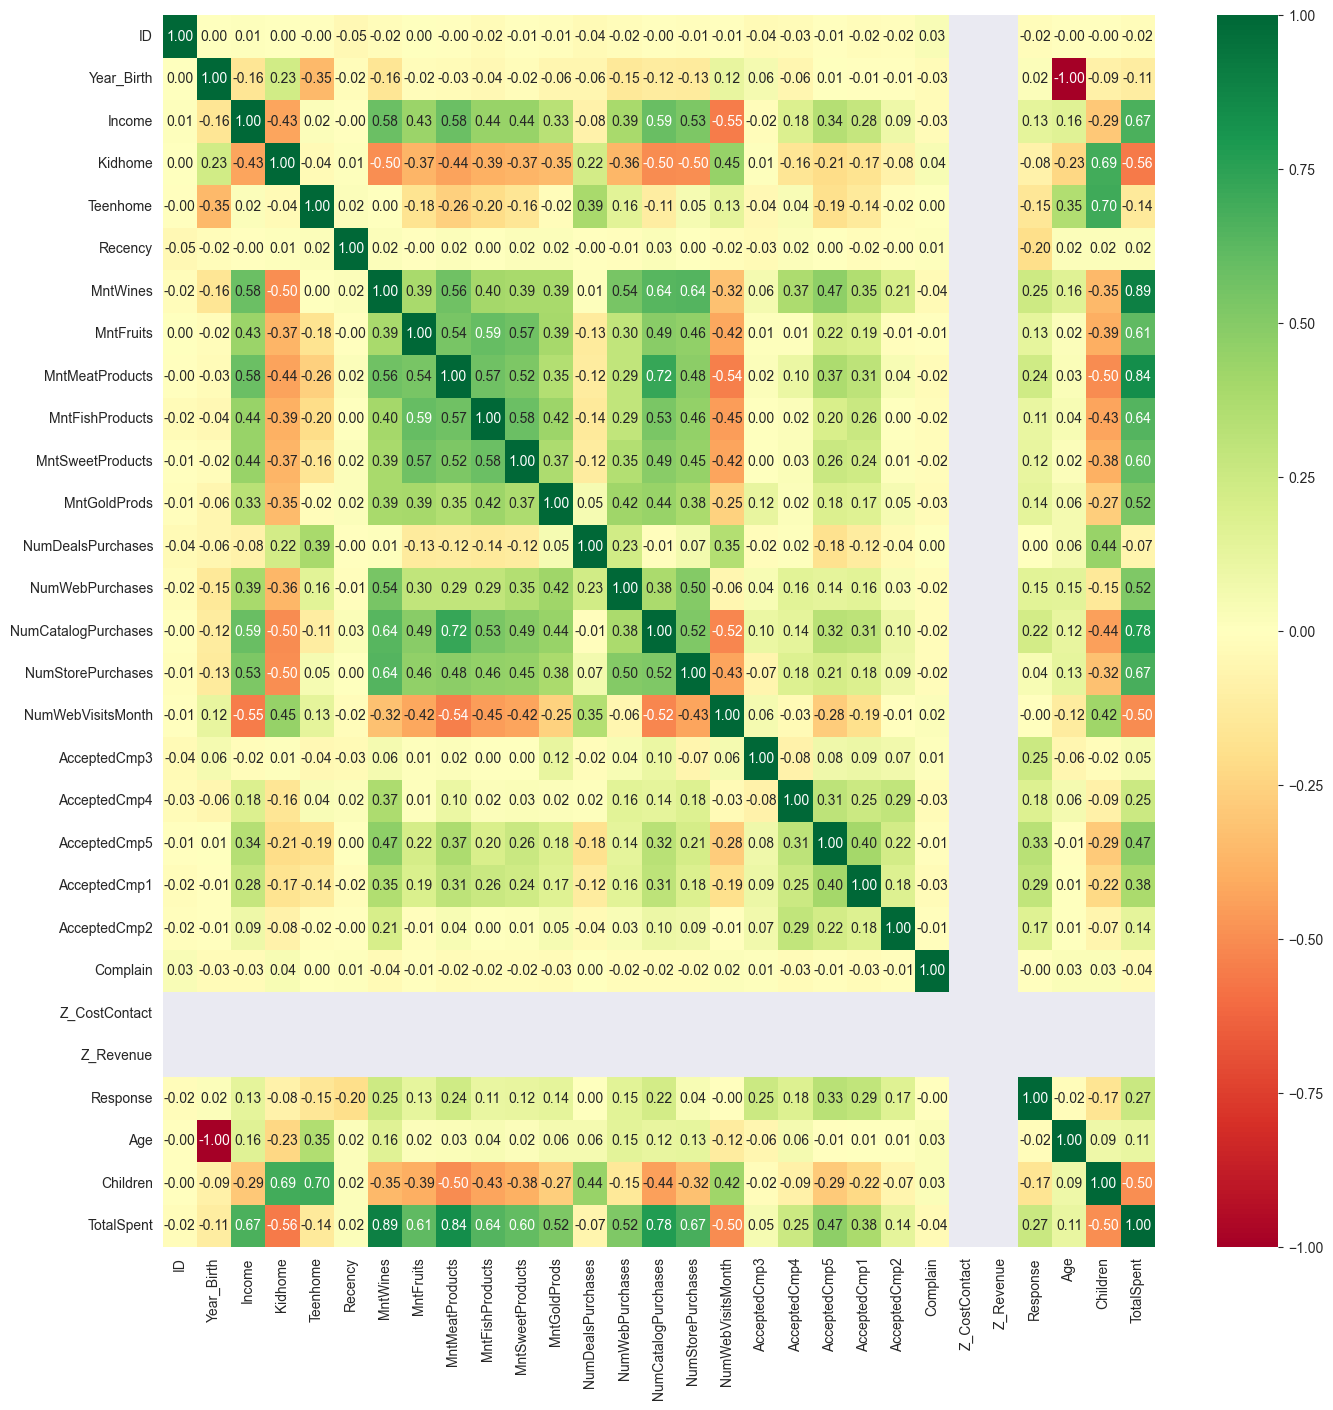

In [203]:
#correlation matrix visualization:
f, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='RdYlGn',annot_kws={'size': 10}, ax=ax)
plt.show()

In [204]:
#filling missing values with mean:

from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')


inc=df.iloc[:,4:5].values
imputer=imputer.fit(inc) #fitting imputer object to age
inc=imputer.transform(inc) #transform method fills missing values with mean of all ages

inc=pd.DataFrame(inc,columns=["Income"])
df["Income"]=inc["Income"]

df.isnull().sum() #checking missing values again


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
Children               0
TotalSpent             0
dtype: int64

In [205]:
#checking outliers:

import plotly.graph_objects as go
from plotly.subplots import make_subplots


first_line = go.Box(x=df["Income"] ,name="Income")
second_line = go.Box(x=df["Year_Birth"] ,name="Year_Birth")
third_line = go.Box(x=df["Age"] ,name="Age")

fig = make_subplots(rows=1, cols=3, shared_yaxes=True, horizontal_spacing=0.10)

fig.add_trace(first_line, row=1, col=1)
fig.add_trace(second_line, row=1, col=2)
fig.add_trace(third_line, row=1, col=3)
fig.update_layout(height=400, width=716, title_text="Creating Subplots in Plotly")

fig.show()

In [206]:
#Outliers detection with IQR:



Q1=df["Age"].quantile(0.25)
Q3=df["Age"].quantile(0.75)
IQR=Q3-Q1 #interquartile range
Q1,Q3,IQR


(46.0, 64.0, 18.0)

In [207]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

lower_limit,upper_limit

(19.0, 91.0)

In [208]:
((df["Age"]>upper_limit) | (df["Age"]<lower_limit)).sum() #aykırı değer sayısı

3

In [209]:
#filling outliers with mean:
outlier_lw=(df["Age"]<lower_limit)
outlier_upp=(df["Age"]>upper_limit)

df["Age"][outlier_lw]=df["Age"].mean()  #lower aykırı değerlerin yerine ortalama değerler yazıldı
df["Age"][outlier_upp]=df["Age"].mean() #upper aykırı değerlerin yerine ortalama değerler yazıldı

C:\Users\ssbgt\AppData\Local\Temp\ipykernel_19308\2654917267.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ssbgt\AppData\Local\Temp\ipykernel_19308\2654917267.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [210]:
#visualizing Age column with boxplot:
import plotly.express as px
fig = px.box(df, y=df["Age"])
fig.show()

C:\Users\ssbgt\AppData\Local\Temp\ipykernel_19308\1600352730.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



These are the most important features that influences Income:
 Income                 1.000000
TotalSpent             0.664706
NumCatalogPurchases    0.586725
MntMeatProducts        0.577802
MntWines               0.576789
NumStorePurchases      0.526489
MntFishProducts        0.437497
MntSweetProducts       0.436162
MntFruits              0.428747
NumWebPurchases        0.380550
Name: Income, dtype: float64


<AxesSubplot: >

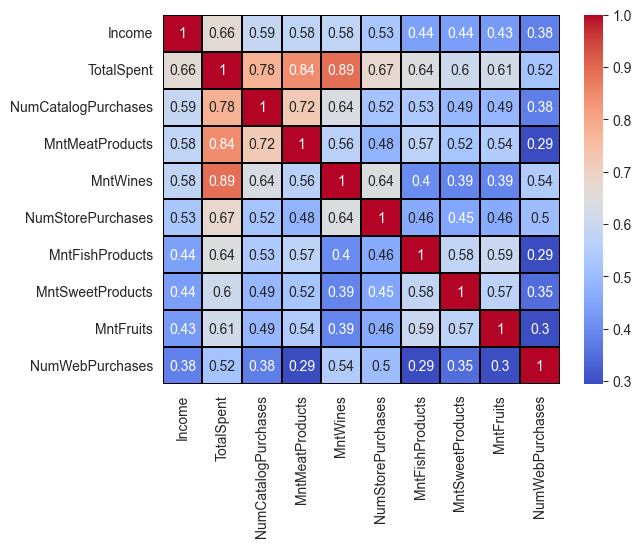

In [211]:
#What are the most important features that influence Income?
a=df.corr()["Income"].sort_values(ascending=False).head(10)

print("These are the most important features that influences Income:\n",a)

sns.set_style("darkgrid")
sns.heatmap(df[a.index].corr(),annot=True,cmap="coolwarm",linewidths=0.2,linecolor="black")

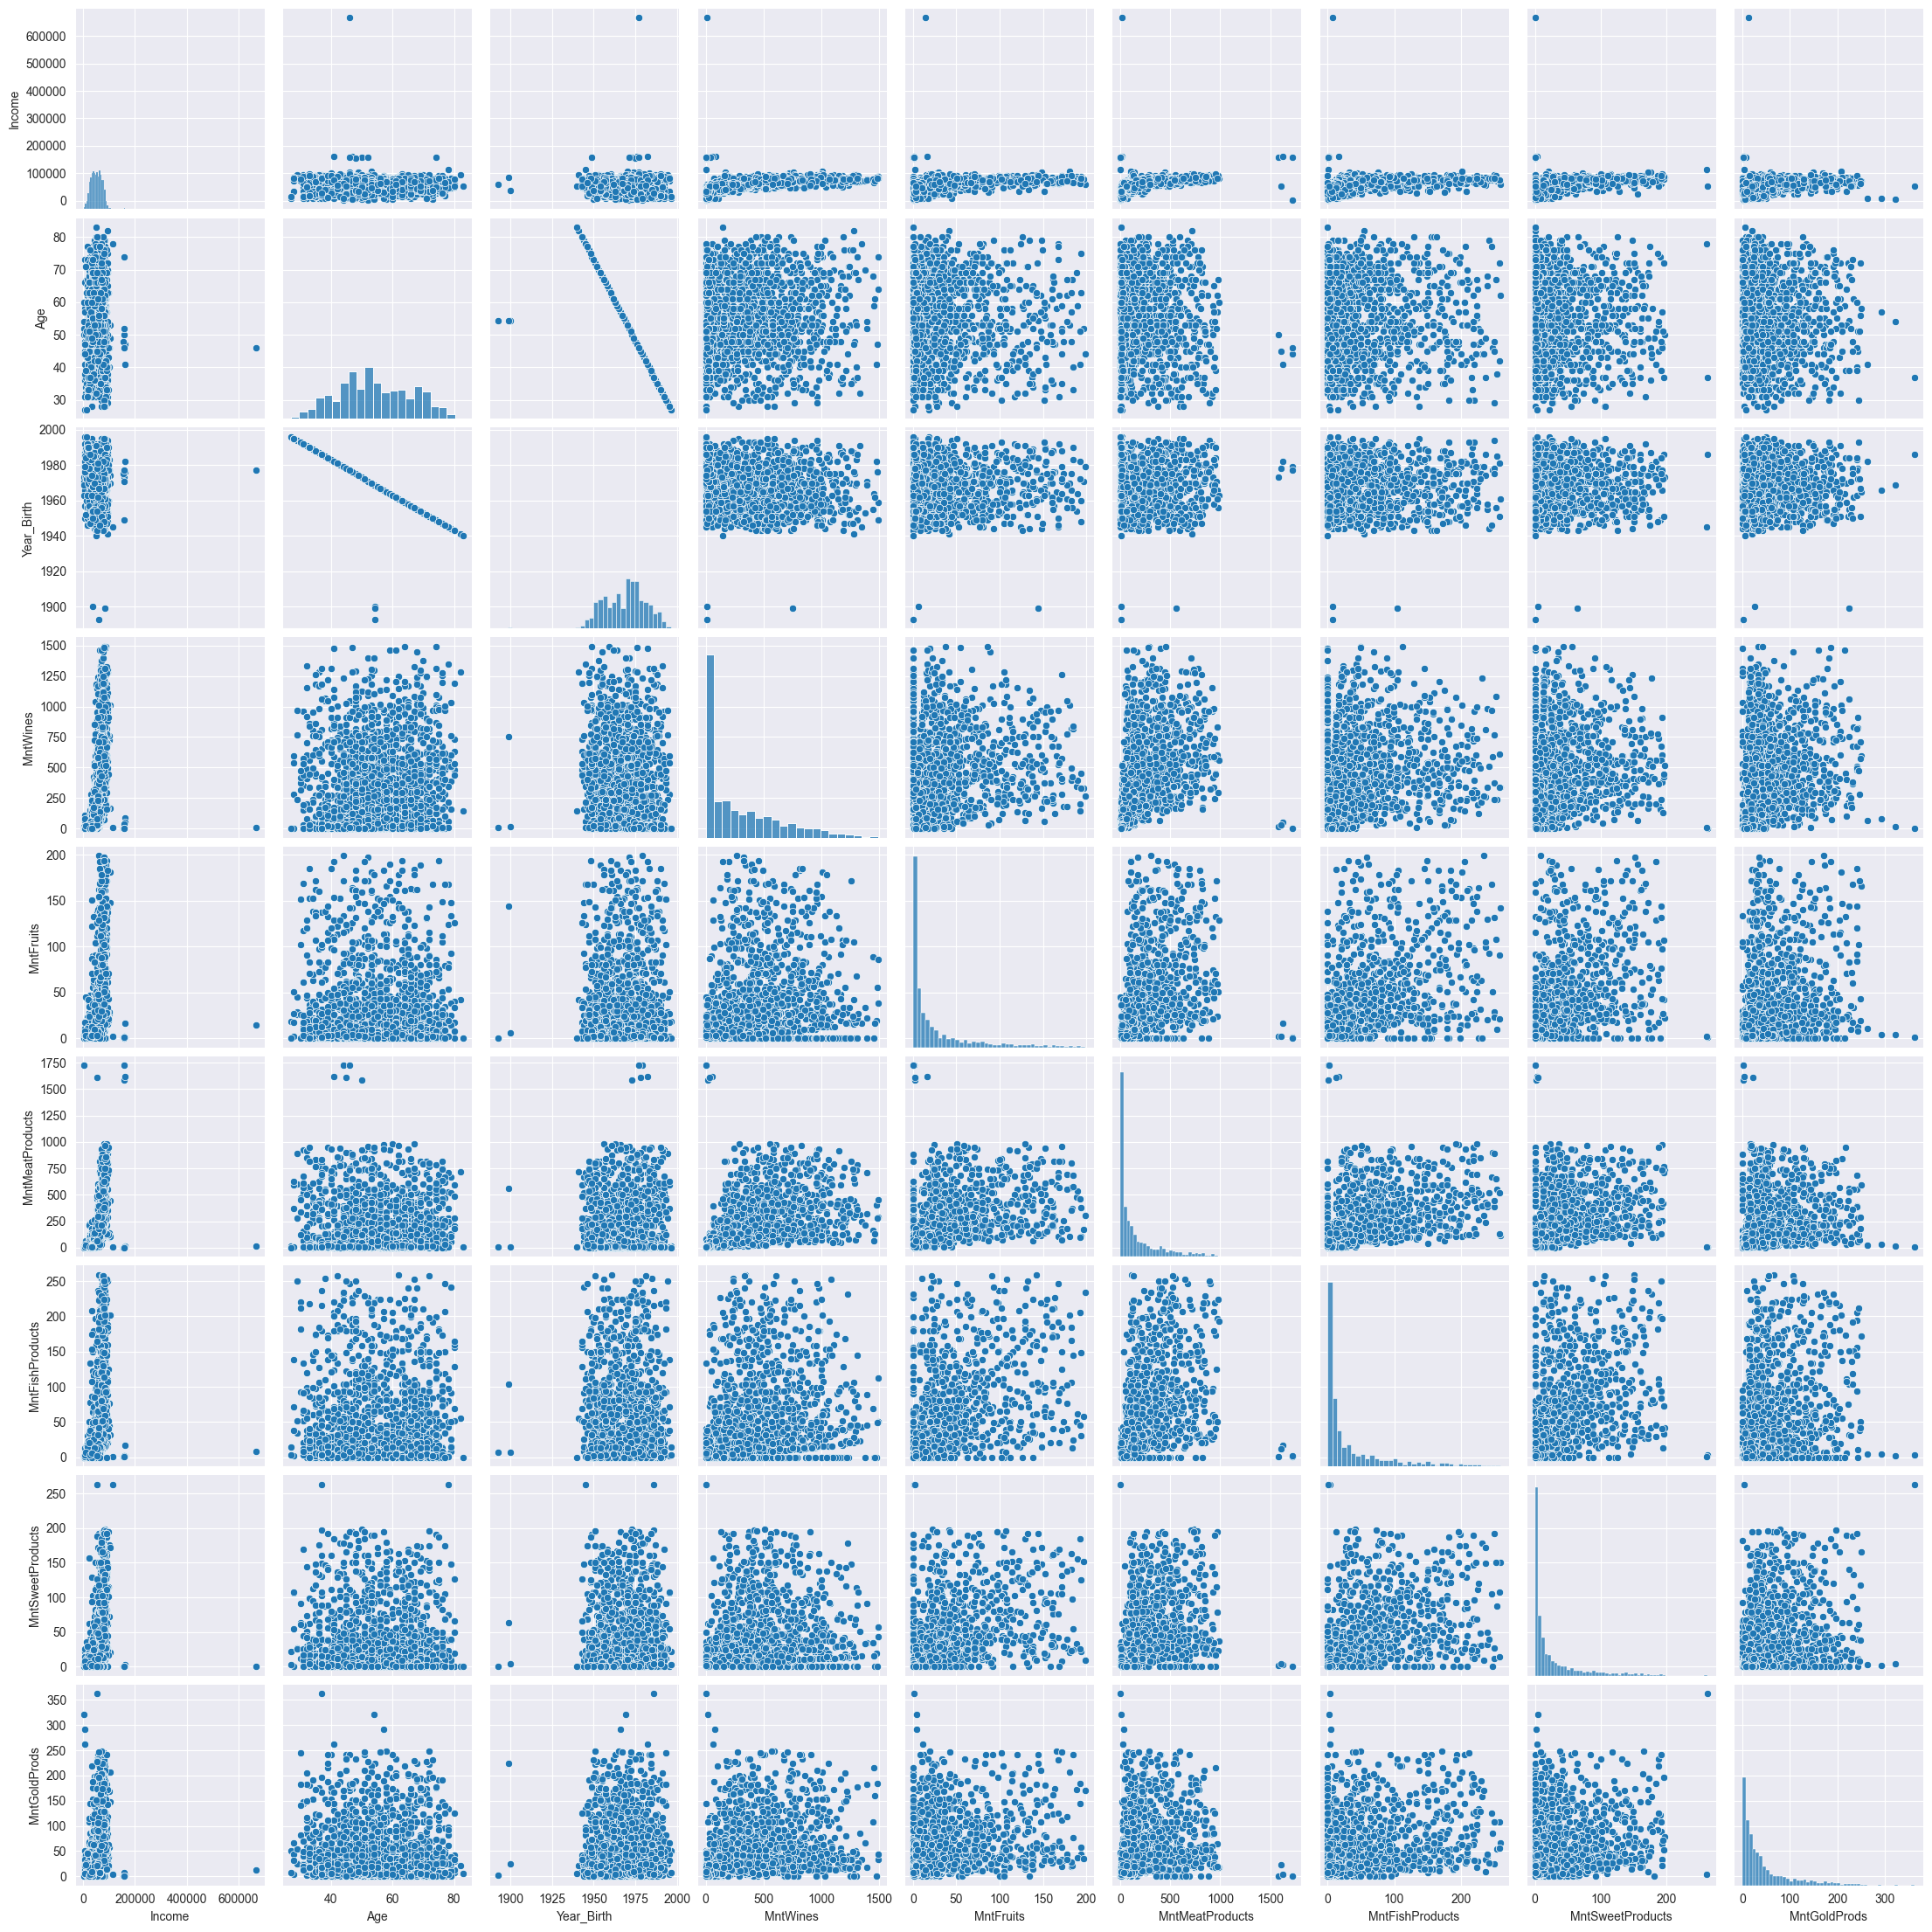

In [212]:
#showing the most important features that influence Income :
sns.color_palette("Paired")
columns_to_plot = ['Income', 'Age', 'Year_Birth', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
sns.pairplot(df[columns_to_plot])

<AxesSubplot: xlabel='Education', ylabel='count'>

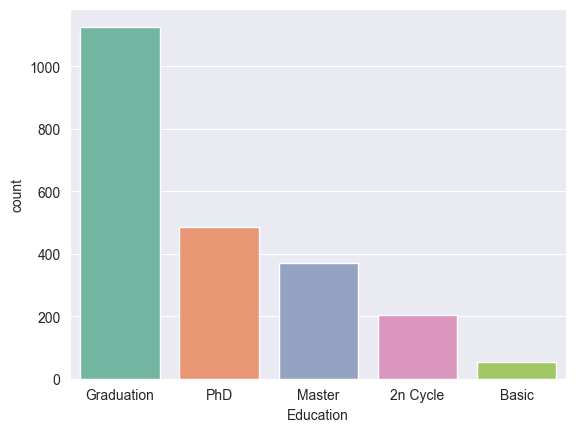

In [213]:
#Number of customers by education:
dt=pd.read_csv(r"datas/marketing_campaign.csv",sep="\t")
df1=dt.copy()
sns.countplot(x="Education",data=df1,palette="Set2",order=df1["Education"].value_counts().index)

In [214]:
#customer income distribution by education:

px.histogram(df1, x="Income", color="Education", marginal="box", hover_data=df1.columns)

In [215]:
#number of selled products:

fruit_cols = ['MntWines', 
              'MntFruits',
              'MntMeatProducts', 
              'MntFishProducts', 
              'MntSweetProducts',
              'MntGoldProds']

# Simplify names
fruit_dict = {'MntWines': 'Wines', 
              'MntFruits': 'Fruits', 
              'MntMeatProducts': 'Meat', 
              'MntFishProducts': 'Fish', 
              'MntSweetProducts': 'Candy',
              'MntGoldProds': 'Gold products'}

# Calc number of each product
fruits = pd.DataFrame(df1[fruit_cols].sum().sort_values(ascending=False))

# Replace names
fruits.index = fruits.index.map(fruit_dict)

# Figure size
plt.figure(figsize=(12, 5))

# Plot figure
px.bar(fruits, x=fruits.index, y=0, color=fruits.index, color_discrete_sequence=px.colors.qualitative.Pastel, title="Number of selled products",
       labels={'index': 'type of products', 'x': 'Product', 'y': 'Number of products'})

<Figure size 1200x500 with 0 Axes>

In [216]:
# label encoding:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df["Marital_Status"]= label_encoder.fit_transform(df["Marital_Status"])
df["Education"]= label_encoder.fit_transform(df["Education"])
#dt["Dt_Customer"]= label_encoder.fit_transform(dt["Dt_Customer"])
  
print(df["Marital_Status"].unique())
print(df["Education"].unique())
#print(dt["Dt_Customer"].unique())


[1 0 2]
[1 0]


In [217]:
#choosing the model:

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

X=df.drop(["Response","Dt_Customer"],axis=1)
y=df["Response"]

# prepare models
models = [('LR', LinearRegression()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror'))]

# evaluate each model in turn
for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")


RMSE: 0.3012 (LR) 
RMSE: 0.3635 (KNN) 
RMSE: 0.4075 (CART) 
RMSE: 0.3013 (RF) 
RMSE: 0.2909 (GBM) 
RMSE: 0.3085 (XGBoost) 


In [252]:
#XGBoost model: I have chosen XGBoost model because it has one of the lowest RMSE value.
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 



# define model
model = XGBClassifier()

# train model
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification report 
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)

# conclusion
print("Classification Report:")
print(cr)

#prediction results:
df2=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df2.head(25)

Accuracy: 85.49%
Confusion Matrix:
[[359  20]
 [ 45  24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       379
           1       0.55      0.35      0.42        69

    accuracy                           0.85       448
   macro avg       0.72      0.65      0.67       448
weighted avg       0.84      0.85      0.84       448



Actual  Predicted
324        0          0
96         0          0
2104       0          0
1259       0          0
1061       0          0
1805       0          0
916        0          0
350        0          0
1901       0          0
1650       0          0
179        0          0
1697       0          0
1442       1          0
787        1          1
1251       0          0
1380       0          0
1303       0          0
1913       1          0
629        0          0
1376       0          0
1574       1          0
368        0          0
240        0          0
482        1          1
809        0          0

Text(0.5, 1.0, 'Actual vs Predicted')

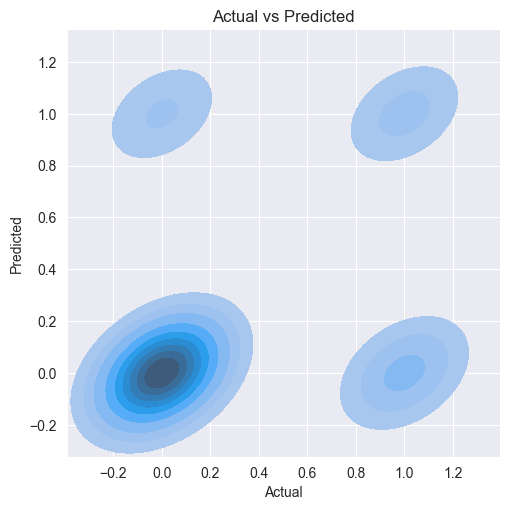

In [253]:
#visualizing prediction results:
sns.displot(x=y_test,y=y_pred,kind="kde",fill=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
